In [26]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from collections import OrderedDict
import glob
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import matplotlib
import matplotlib.font_manager as font_manager
from matplotlib.lines import Line2D
from matplotlib import gridspec
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

def convert_nan_to_val(data, value=0):
    data[pd.isnull(data)] = value
    return data

In [27]:
not_combined_pickle_file = './paper_models_csvs_pkls/data_models-sig_rem_False_stat_sig_False_top_sig_False_0_30avg_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo.pkl'
combined_pickle_file = './paper_models_csvs_pkls/combined_data_models-sig_rem_False_stat_sig_False_top_sig_False_0_30avg_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo.pkl'
### The non-batch corrected pickle for the dataset
not_combined_ds = pickle.load(open(not_combined_pickle_file, 'rb'))
combined_ds = pickle.load(open(combined_pickle_file, 'rb'))

not_combined_pickle_file_stat_sig = './paper_models_csvs_pkls/data_models-sig_rem_False_stat_sig_True_top_sig_False_0_30avg_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo.pkl'
combined_pickle_file_stat_sig = './paper_models_csvs_pkls/combined_data_models-sig_rem_False_stat_sig_True_top_sig_False_0_30avg_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo.pkl'
### The non-batch corrected pickle for the dataset
not_combined_ds_stat_sig = pickle.load(open(not_combined_pickle_file_stat_sig, 'rb'))
combined_ds_stat_sig = pickle.load(open(combined_pickle_file_stat_sig, 'rb'))

not_combined_pickle_file_no_stat_sig = './paper_models_csvs_pkls/data_models-sig_rem_True_stat_sig_False_top_sig_False_0_30avg_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo.pkl'
combined_pickle_file_no_stat_sig = './paper_models_csvs_pkls/combined_data_models-sig_rem_True_stat_sig_False_top_sig_False_0_30avg_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo.pkl'
### The non-batch corrected pickle for the dataset
not_combined_ds_no_stat_sig = pickle.load(open(not_combined_pickle_file_no_stat_sig, 'rb'))
combined_ds_no_stat_sig = pickle.load(open(combined_pickle_file_no_stat_sig, 'rb'))

not_combined_pickle_file_no_stat_sig_no_addiso = './paper_models_csvs_pkls/data_models-sig_rem_True_rem_add_True_stat_sig_False_top_sig_False_0_30avg_log_reg_YES_bn_NO_log_NO_standscal_YES_ovo.pkl'
### The non-batch corrected pickle for the dataset
not_combined_ds_no_stat_sig_no_addiso = pickle.load(open(not_combined_pickle_file_no_stat_sig_no_addiso, 'rb'))

In [28]:
non_combined_to_keep = ['IPO_aligned_ST000763_untar_neg_Healthy_PAH', 'IPO_aligned_ST000763_untar_neg_Normal Pressures_LowRisk',
                        'IPO_aligned_ST000763_untar_neg_Borderline Pressures_LowRisk', 'IPO_aligned_ST000763_untar_neg_PAH_Normal Pressures',
                        'IPO_aligned_ST000763_untar_neg_Healthy_LowRisk', 'IPO_aligned_ST000763_untar_neg_Healthy_Borderline Pressures',
                        'IPO_aligned_ST000763_untar_neg_Normal Pressures_Borderline Pressures', 'IPO_aligned_MTBLS408_pos',
                        'IPO_aligned_ST000763_untar_neg_Healthy_Normal Pressures', 'IPO_aligned_ST000763_untar_pos_Normal Pressures_LowRisk',
                        'IPO_aligned_ST000763_untar_neg_PAH_Borderline Pressures', 'IPO_aligned_ST000763_untar_pos_Normal Pressures_Borderline Pressures',
                        'IPO_aligned_ST000763_untar_pos_PAH_LowRisk', 'IPO_aligned_ST000763_untar_pos_PAH_Borderline Pressures',
                        'IPO_aligned_ST000763_untar_pos_Borderline Pressures_LowRisk', 'IPO_aligned_MTBLS408_neg', 
                        'IPO_aligned_ST000763_untar_pos_PAH_Normal Pressures', 'IPO_aligned_ST000763_untar_neg_PAH_LowRisk', 
                        'IPO_aligned_ST000763_untar_pos_Healthy_Borderline Pressures', 'IPO_aligned_ST000763_untar_pos_Healthy_Normal Pressures',
                        'IPO_aligned_ST000763_untar_pos_Healthy_PAH', 'IPO_aligned_ST000763_untar_pos_Healthy_LowRisk', 'IPO_aligned_MTBLS28_pos', 
                        'IPO_aligned_ST000385_onebatch_plasma', 'AN000582', 'AN000583', 'AN000580', 'AN000452_Healthy_Polyp',
                        'AN000452_CRC_Polyp', 'IPO_aligned_ST000385_onebatch_serum', 'AN000452_Healthy_CRC', 'IPO_aligned_MTBLS92',
                        'AN000581', 'IPO_aligned_ST000388_LC', 'IPO_aligned_ST000392_serum', 'IPO_aligned_ST000392_plasma',
                        'IPO_aligned_MTBLS28_neg', 'IPO_aligned_ST000396', 'IPO_aligned_ST000865_onebatch', 
                        'IPO_aligned_MTBLS105_SIM-MS', 'IPO_aligned_MTBLS105_qMS', 'IPO_aligned_MTBLS17_neg_onebatch', 
                        'IPO_aligned_MTBLS17_pos_onebatch', 'IPO_aligned_MTBLS19_pos_all_F_R', 'IPO_aligned_MTBLS19_neg_all_F_R', 
                        'IPO_aligned_ST000388_GC', 'AN001503', 'serum_onebatch_IPO_align_Feng_serum_all', 
                        'urine_onebatch_IPO_aligned_Feng_urine_all', 'ulsam_IPO_reprocessedfirst',
                        'IPO_aligned_ST000329_neg_FSGS_Control', 'IPO_aligned_ST000329_pos_MCD_Control',
                        'IPO_aligned_ST000329_neg_MCD_FSGS', 'IPO_aligned_ST000329_neg_MCD_Control', 
                        'IPO_aligned_ST000329_pos_MCD_FSGS', 'IPO_aligned_ST000329_pos_FSGS_Control', 'AN001450',
                        'IPO_aligned_MTBLS315_p_mzML', 'IPO_aligned_MTBLS315_mzData', 'IPO_aligned_MTBLS315_n_mzML', 
                        'IPO_aligned_MTBLS315_mzXML', 'm_chronic_hep_b_NEG', 'm_oxylipin_chronic_hep_b', 'IPO_aligned_MTBLS354_pos', 
                        'IPO_aligned_ST000578_AE', 'm_typhoid_carriage_metabolite_profiling_mass_spectrometry_v2_maf', 
                        'IPO_aligned_ST000578_C18', 'm_chronic_hep_b_POS', 'IPO_aligned_MTBLS354_neg', 'IPO_aligned_MTBLS352_neg_T2D_Pre-DM',
                        'AN000618', 'IPO_aligned_MTBLS352_neg_T2D_NGT', 'IPO_aligned_ST000045_2feb_pos_ND_IW', 
                        'IPO_aligned_ST000045_2feb_pos_ND_II', 'IPO_aligned_ST000045_2feb_pos_II_IW', 'IPO_aligned_ST000045_11feb_neg_ND_IW',
                        'IPO_aligned_ST000045_11feb_neg_II_IW', 'IPO_aligned_ST000045_11mar_pos_ND_II', 'IPO_aligned_ST000045_11mar_pos_ND_IW',
                        'IPO_aligned_ST000045_11mar_pos_II_IW', 'IPO_aligned_ST000045_17mar_neg_ND_II', 'IPO_aligned_ST000045_17mar_neg_ND_IW',
                        'IPO_aligned_ST000045_17mar_neg_II_IW', 'AN000929', 'AN000931', 'AN000930', 'IPO_aligned_MTBLS352_neg_NGT_Pre-DM', 
                        'IPO_aligned_ST000045_11feb_neg_ND_II', 'XCMS-Report-annotated-SingleClass-GCTOF.plasma', 
                        'IPO_aligned_ST000046_20120618_pos_c18_MCI_AD', 'XCMS-Report-annotated-SingleClass.04jun12_CN_AD', 
                        'XCMS-Report-annotated-SingleClass-GCTOF.', 'XCMS-Report-annotated-SingleClass.27jun12_MCI_AD', 
                        'XCMS-Report-annotated-SingleClass.27jun12_CN_AD', 'XCMS-Report-annotated-SingleClass.11jun12_CN_MCI', 
                        'IPO_aligned_MTBLS72_pos', 'IPO_aligned_ST000046_20120620_neg_c18_MCI_AD', 
                        'IPO_aligned_ST000046_20120620_neg_c18_CN_AD', 'IPO_aligned_ST000046_20120620_neg_c18_CN_MCI', 
                        'IPO_aligned_ST000046_20120618_pos_c18_CN_AD', 'IPO_aligned_ST000046_20120618_pos_c18_CN_MCI', 
                        'IPO_aligned_ST000046_20120613_neg_hilic_MCI_AD', 'XCMS-Report-annotated-SingleClass.04jun12_MCI_AD', 
                        'IPO_aligned_ST000046_20120613_neg_hilic_CN_AD', 'IPO_aligned_ST000046_20120613_neg_hilic_CN_MCI', 
                        'IPO_aligned_ST000046_20120606_neg_hilic_MCI_AD', 'IPO_aligned_ST000046_20120606_neg_hilic_CN_AD', 
                        'IPO_aligned_ST000046_20120606_neg_hilic_CN_MCI', 'IPO_aligned_ST000046_20120625_pos_c18_CN_MCI', 
                        'IPO_aligned_ST000046_20120625_pos_c18_CN_AD', 'IPO_aligned_ST000046_20120625_pos_c18_MCI_AD', 
                        'XCMS-Report-annotated-SingleClass.04jun12_CN_MCI', 'XCMS-Report-annotated-SingleClass.27jun12_CN_MCI', 
                        'XCMS-Report-annotated-SingleClass.11jun12_MCI_AD', 'XCMS-Report-annotated-SingleClass.11jun12_CN_AD', 
                        'IPO_aligned_MTBLS72_neg', 'IPO_aligned_MTBLS364_hil_neg', 'IPO_aligned_MTBLS364_lip_pos', 
                        'IPO_aligned_MTBLS364_lip_neg', 'IPO_aligned_MTBLS364_hil_pos', 'IPO_aligned_ST000381_pos', 'AN000706', 
                        'IPO_aligned_MTBLS266_pos', 'IPO_aligned_MTBLS266_neg', 'AN000705', 'm_TAG_mass_spectrometry_v4_FS_NS', 
                        'm_SHOT_mass_spectrometry_v4_FS_CS', 'm_TAG_mass_spectrometry_v4_FS_CS', 'm_EICO_mass_spectrometry_v4_FS_NS', 
                        'm_TAG_mass_spectrometry_v4_COPD_CS', 'm_CER_mass_spectrometry_v4_COPD_CS', 'm_CER_mass_spectrometry_v4_COPD_NS',
                        'm_CER_mass_spectrometry_v4_FS_CS', 'm_CER_mass_spectrometry_v4_FS_NS', 'm_CER_mass_spectrometry_v4_COPD_FS', 
                        'm_EICO_mass_spectrometry_v4_COPD_FS', 'm_EICO_mass_spectrometry_v4_COPD_CS', 'm_EICO_mass_spectrometry_v4_COPD_NS',
                        'm_EICO_mass_spectrometry_v4_FS_CS', 'm_EICO_mass_spectrometry_v4_CS_NS', 'm_TAG_mass_spectrometry_v4_CS_NS', 
                        'm_SHOT_mass_spectrometry_v4_COPD_FS', 'm_SHOT_mass_spectrometry_v4_COPD_CS', 'm_SHOT_mass_spectrometry_v4_COPD_NS',
                        'm_SHOT_mass_spectrometry_v4_FS_NS', 'm_SHOT_mass_spectrometry_v4_CS_NS', 'm_TAG_mass_spectrometry_v4_COPD_FS', 
                        'm_TAG_mass_spectrometry_v4_COPD_NS', 'm_CER_mass_spectrometry_v4_CS_NS']
fixes = {'autoimmune': 'rheumatologic', 'glomerular':'renal', 'metabolic':'endocrine',
         'neurological':'Neuro/Neuropsychiatric', 
         'minimal change disease, focal segmental sclerosis':'minimal change disease, focal segmental sclerosis, healthy',
         'Alzheimers':"Alzheimer's", 
         'Stability of dried blood samples - diabetic men':'diabetic men (long sample storage)',
         'lung cancer - non-small-cell lung cancer (adenocarcinoma, etc)': 'lung cancer', 
         'lung cancer - adenocarcinoma':'lung cancer',
         'scleroderma PAH': 'Pulmonary Artery Hypertension in Scleroderma',
         'Obesity - Non-diabetic and T2 diabetic': 't2 diabetes'
         }

In [47]:
#### calculate the fold enrichment for a given dataset and toss studies you cant perform any sort of analysis on...
#### see list above on what can be kept!
def remove_studies(ds_to_study):
    for study in ds_to_study:
        new_study_list = []
        to_remove_study = []
        for sub_study in ds_to_study[study]:
            if sub_study['data_set'] in non_combined_to_keep:
                new_study_list.append(sub_study)
        ds_to_study[study] = new_study_list
    return ds_to_study

def calc_enrichment(dataset):
    X = dataset['features'].values.copy()
    X[np.isinf(X)] = 0
    X[X<0] = 0
    y = dataset['labels'].values.ravel()
    y = np.asarray([int(i) for i in y])
    delta = np.zeros(X.shape[1]) + np.nan
    
    for i in range(X.shape[1]):
        feat_data = []
        for j in dataset['label_set']:
            try:
                X_0 = X[y==j,i]
                X_0 = X_0[~np.isnan(X_0)]
                feat_data.append(X_0)
            except:
                pass 
        delta[i] = feat_data[1].mean()/feat_data[0].mean()
    dataset['enrichment'] = delta

### remove the not used studies
### then calc whether a feature is enriched in the case or controls

### for figure 5:
all_feat = False
if all_feat:
    ds_to_study = not_combined_ds_no_stat_sig_no_addiso.copy()

### for figure 4: 
noaddiso = True
if noaddiso:
    ds_to_study = not_combined_ds.copy()


ds_to_study = remove_studies(ds_to_study)
for study in ds_to_study:
    for sub_study in ds_to_study[study]:
        calc_enrichment(sub_study)

In [48]:
### fix some of the datasets so that the mz and rt columns are correct
def set_mz_rt_name(ds_to_study):
    for k, v in ds_to_study.items(): 
        for ds in v:
            replace = {'mass_to_charge':'mz', 'mzmed':'mz', 'Mass':'mz', 'm/z':'mz', 'Mass-to-Charge':'mz',
                       'moverz_quant':'mz','quant mz':'mz', 'quantified m/z':'mz', 'row m/z':'mz', 'Quant mx':'mz', 
                       'Quantified m/z':'mz',
                       'retention_time':'rt', 'rtmed':'rt', 'Retention Time':'rt', 'RT':'rt','row retention time':'rt',
                        'retention index':'rt', 'ri':'rt', 'retention time':'rt' }
            ds['peaks'] = ds['peaks'].rename(columns=replace)
studies = [not_combined_ds_stat_sig, not_combined_ds_no_stat_sig,not_combined_ds_no_stat_sig_no_addiso, not_combined_ds]
for s_ in studies:
    set_mz_rt_name(s_)

### now looking at individual ds features like mz, rt, enrichment, p_values, model_coefs

Feng
(3332, 10) 3332 (3332,)
(5146, 10) 5146 (5146,)
0.0019_0.0014


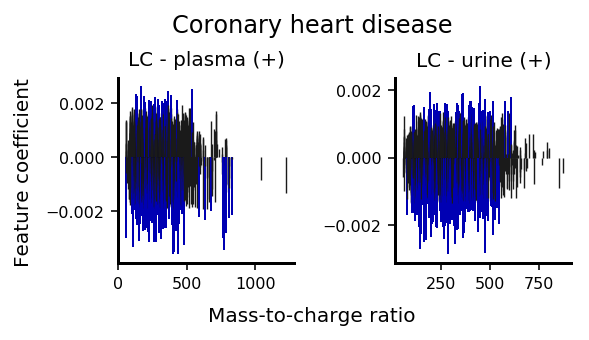

MTBLS17
(11285, 10) 11285 (11285,)
(19711, 10) 19711 (19711,)
0.001_0.0006


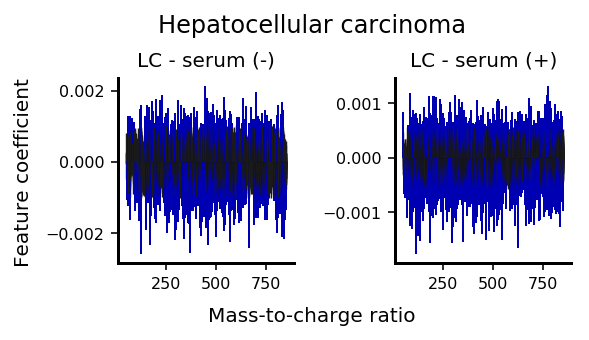

MTBLS19_data
(4306, 10) 4306 (4306,)
(7460, 10) 7460 (7460,)
0.0015_0.0009


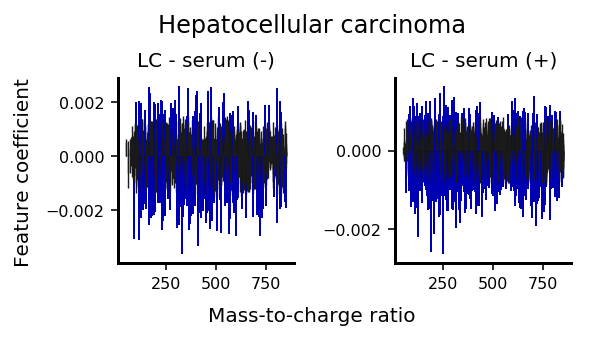

MTBLS266
(15665, 10) 15665 (15665,)
(21028, 10) 21028 (21028,)
0.0002_0.0001


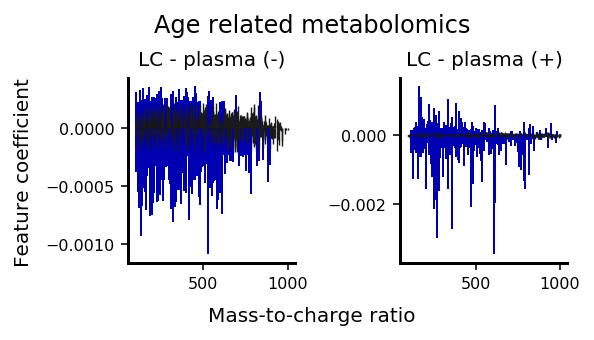

MTBLS28
(2404, 10) 2404 (2404,)
(2429, 10) 2429 (2429,)
0.01_0.01


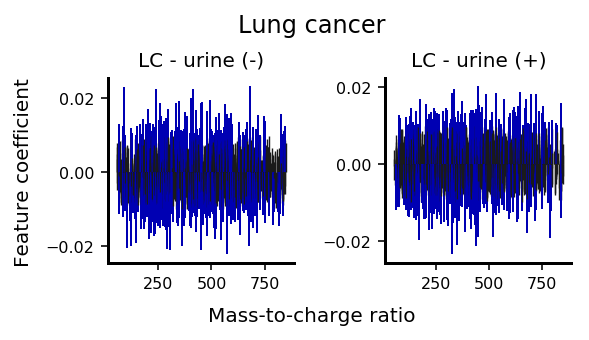

MTBLS315
(8197, 10) 8197 (8197,)
(22444, 10) 22444 (22444,)
(24857, 10) 24857 (24857,)
0.0007_0.0002_0.0002


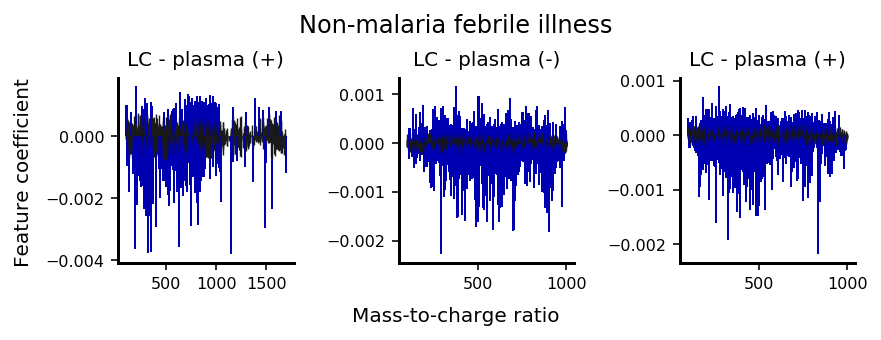

MTBLS352
(2518, 6) 2518 (2518,)
(2696, 6) 2696 (2696,)
(2723, 6) 2723 (2723,)
0.0053_0.0032_0.0032


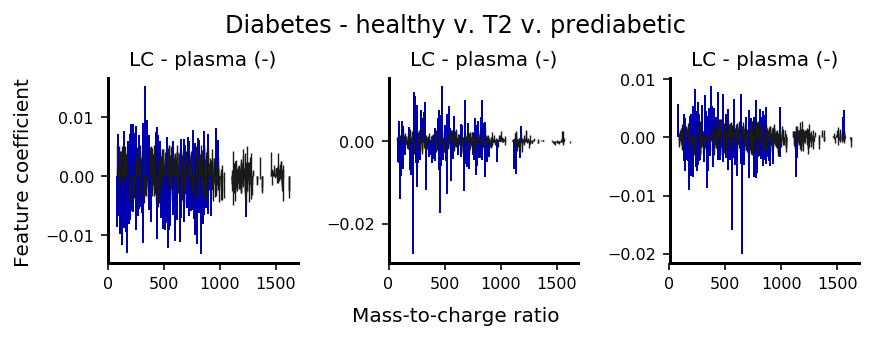

MTBLS354
(4321, 10) 4321 (4321,)
(8457, 10) 8457 (8457,)
0.0026_0.002


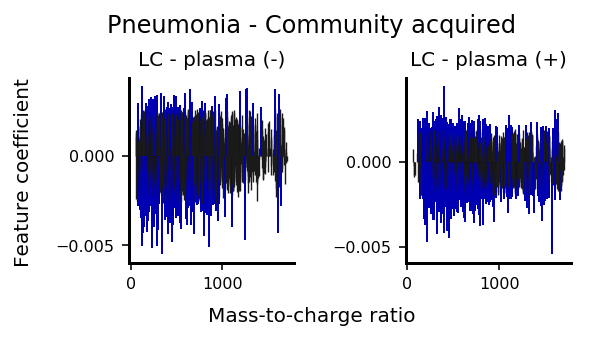

MTBLS364
(912, 10) 912 (912,)
(3043, 10) 3043 (3043,)
(187, 10) 187 (187,)
(1563, 10) 1563 (1563,)
0.0064_0.002_0.01_0.0045


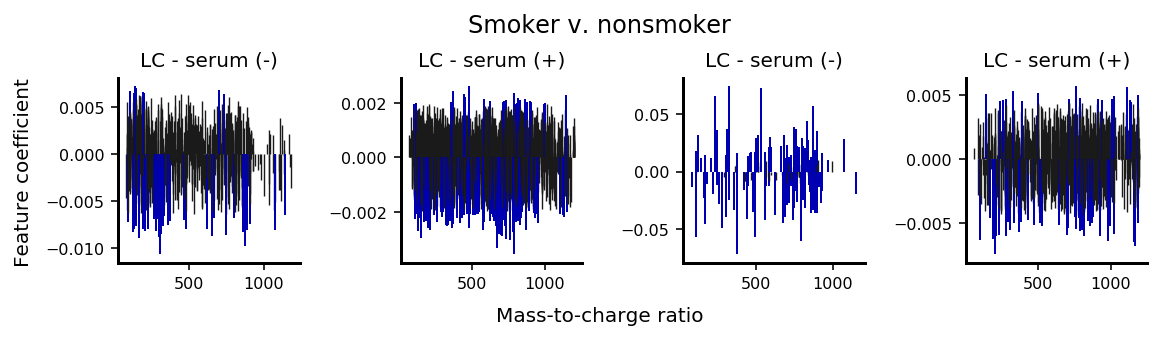

MTBLS408
(1233, 6) 1233 (1233,)
(1985, 6) 1985 (1985,)
0.0051_0.005


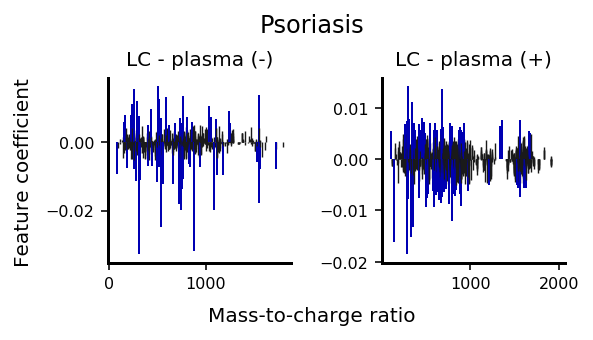

MTBLS72
(6382, 10) 6382 (6382,)
(4523, 10) 4523 (4523,)
0.001_0.0017


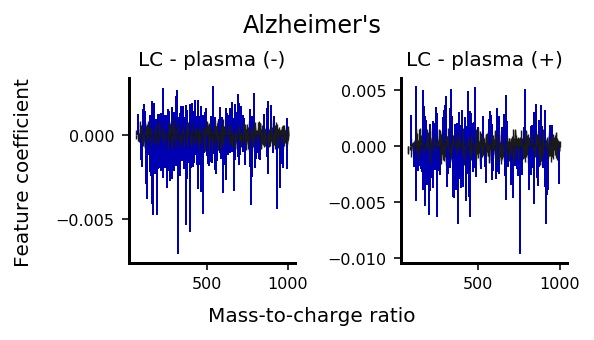

MTBLS92
(5847, 10) 5847 (5847,)
0.0018


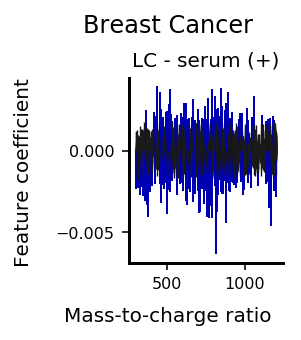

ST000045
(19257, 10) 19257 (19257,)
(19257, 10) 19257 (19257,)
(18711, 10) 18711 (18711,)
(3255, 10) 3255 (3255,)
(3087, 10) 3087 (3087,)
(3038, 10) 3038 (3038,)
(20154, 10) 20154 (20154,)
(20154, 10) 20154 (20154,)
(20154, 10) 20154 (20154,)
(47102, 10) 47102 (47102,)
(47102, 10) 47102 (47102,)
(47102, 10) 47102 (47102,)
0.0001_0.0001_0.0001_0.0006_0.0007_0.0007_0.0001_0.0001_0.0001_0.0001_0.0001_0.0001


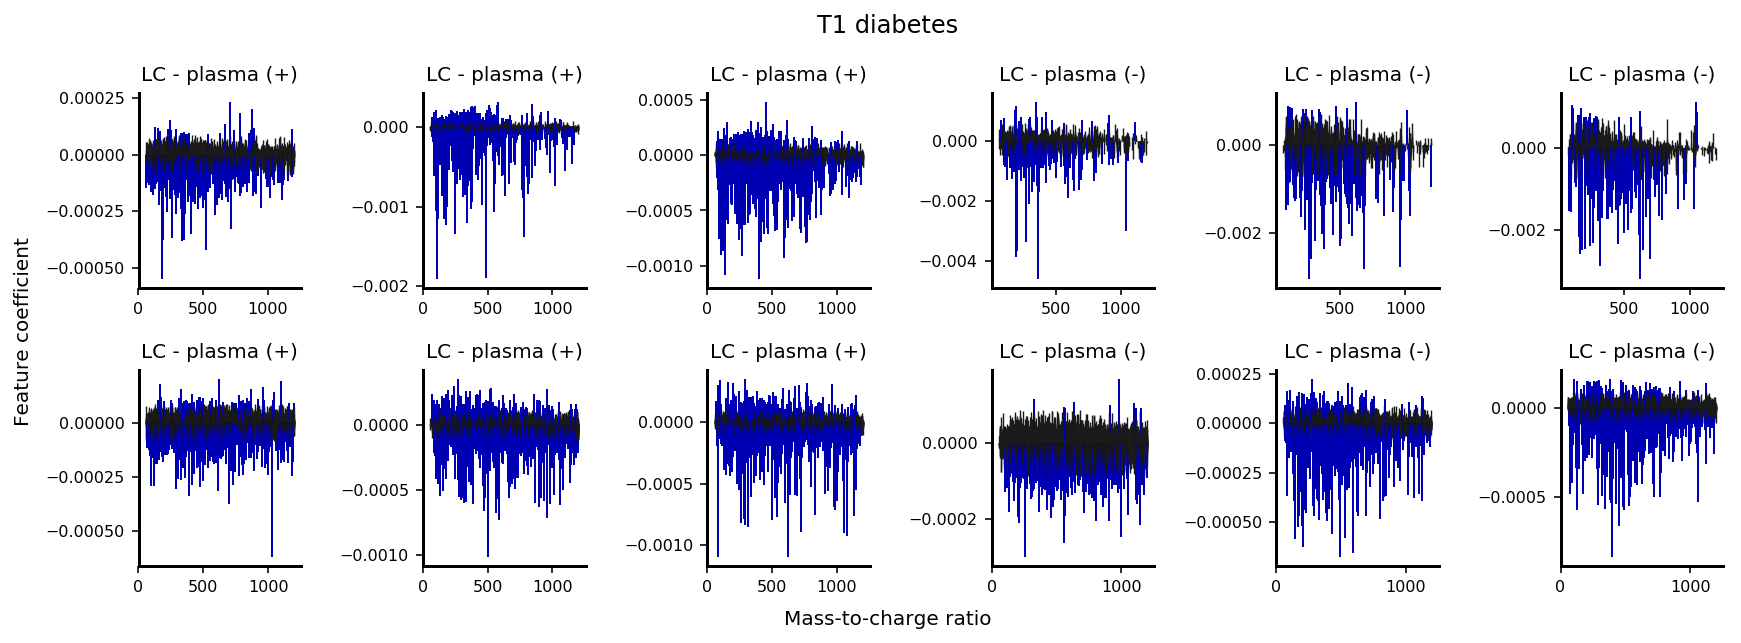

ST000046
(18223, 10) 18223 (18223,)
(18223, 10) 18223 (18223,)
(18223, 10) 18223 (18223,)
(9685, 10) 9685 (9685,)
(9624, 10) 9624 (9624,)
(9685, 10) 9685 (9685,)
(12009, 10) 12009 (12009,)
(12009, 10) 12009 (12009,)
(12009, 10) 12009 (12009,)
(13671, 10) 13671 (13671,)
(13671, 10) 13671 (13671,)
(13671, 10) 13671 (13671,)
(6167, 10) 6167 (6167,)
(6167, 10) 6167 (6167,)
(6167, 10) 6167 (6167,)
(2096, 10) 2096 (2096,)
(2089, 10) 2089 (2089,)
(2095, 10) 2095 (2095,)
(998, 10) 998 (998,)
(1000, 10) 1000 (1000,)
(989, 10) 989 (989,)
(885, 10) 885 (885,)
(940, 10) 940 (940,)
(942, 10) 942 (942,)
0.0002_0.0002_0.0001_0.0003_0.0003_0.0002_0.0002_0.0003_0.0001_0.0001_0.0002_0.0001_0.0006_0.0005_0.0003_0.0014_0.0015_0.001_0.0026_0.0036_0.0016_0.0035_0.0027_0.0027


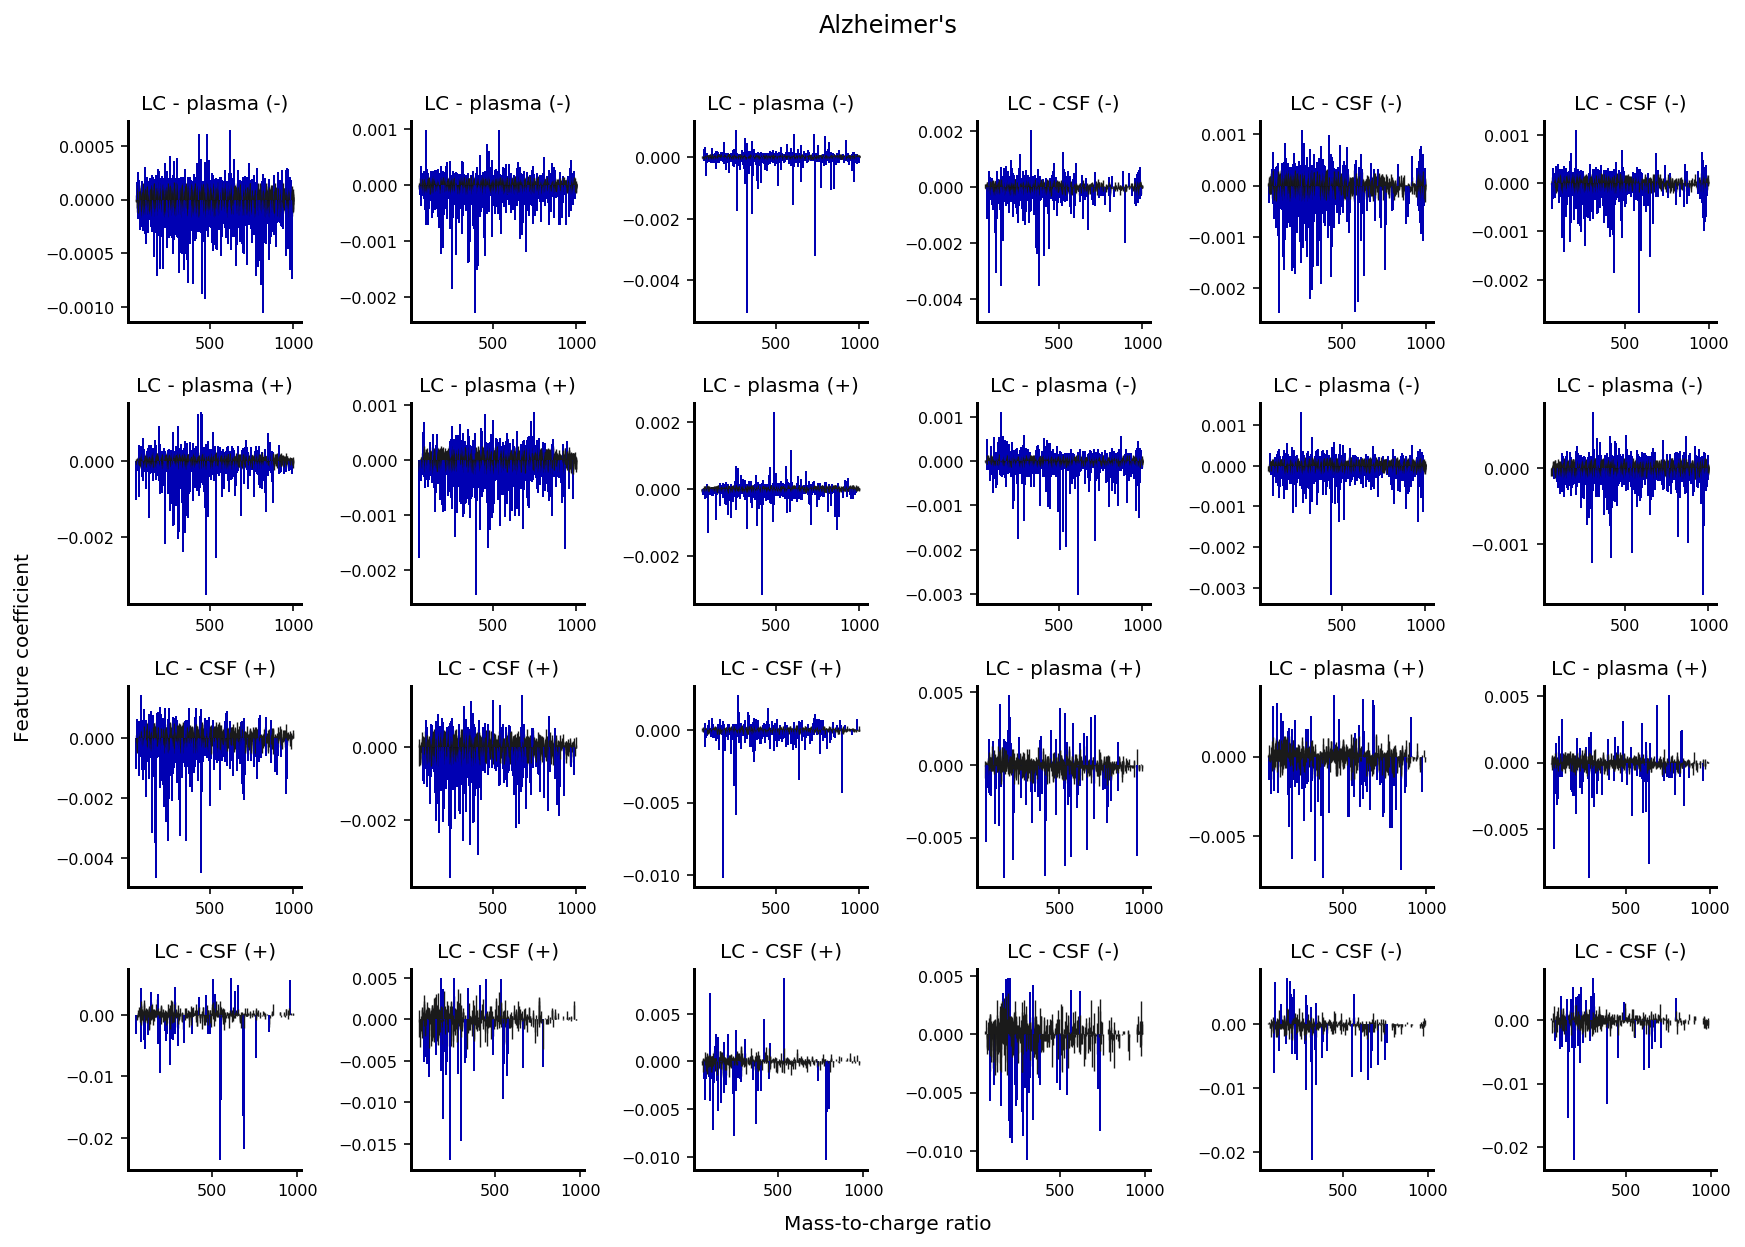

ST000329
(17498, 10) 17498 (17498,)
(16252, 10) 16252 (16252,)
(17040, 10) 17040 (17040,)
(6256, 7) 6256 (6256,)
(5975, 7) 5975 (5975,)
(6016, 7) 6016 (6016,)
0.0001_0.0002_0.0002_0.0003_0.0005_0.0005


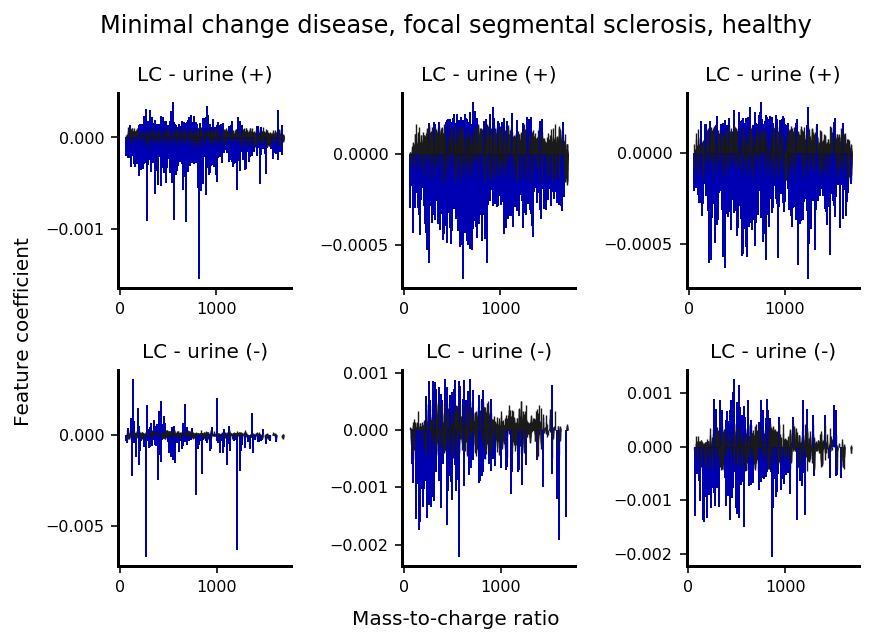

ST000388
(43044, 10) 43044 (43044,)
0.0001


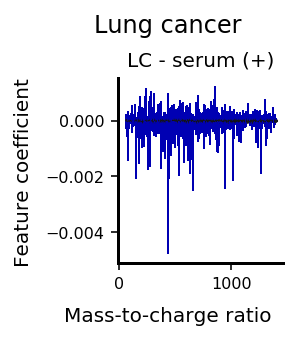

ST000578
(2383, 10) 2383 (2383,)
(8066, 10) 8066 (8066,)
0.0024_0.0005


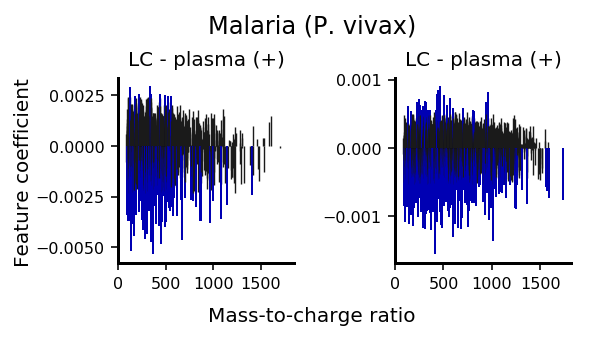

ST000608



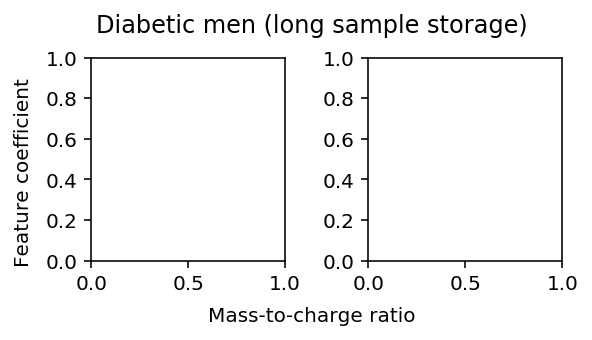

ST000763
(11307, 10) 11307 (11307,)
(14266, 10) 14266 (14266,)
(13918, 10) 13918 (13918,)
(26187, 10) 26187 (26187,)
(28359, 10) 28359 (28359,)
(28670, 10) 28670 (28670,)
(17856, 10) 17856 (17856,)
(28665, 10) 28665 (28665,)
(24201, 10) 24201 (24201,)
(20361, 10) 20361 (20361,)
(13997, 10) 13997 (13997,)
(16438, 10) 16438 (16438,)
(15169, 10) 15169 (15169,)
(25652, 10) 25652 (25652,)
(28491, 10) 28491 (28491,)
(28559, 10) 28559 (28559,)
(23216, 10) 23216 (23216,)
(28575, 10) 28575 (28575,)
(25975, 10) 25975 (25975,)
(23474, 10) 23474 (23474,)
0.0006_0.0004_0.0005_0.0003_0.0001_0.0002_0.0004_0.0001_0.0002_0.0003_0.0005_0.0003_0.0005_0.0003_0.0002_0.0002_0.0003_0.0002_0.0002_0.0003


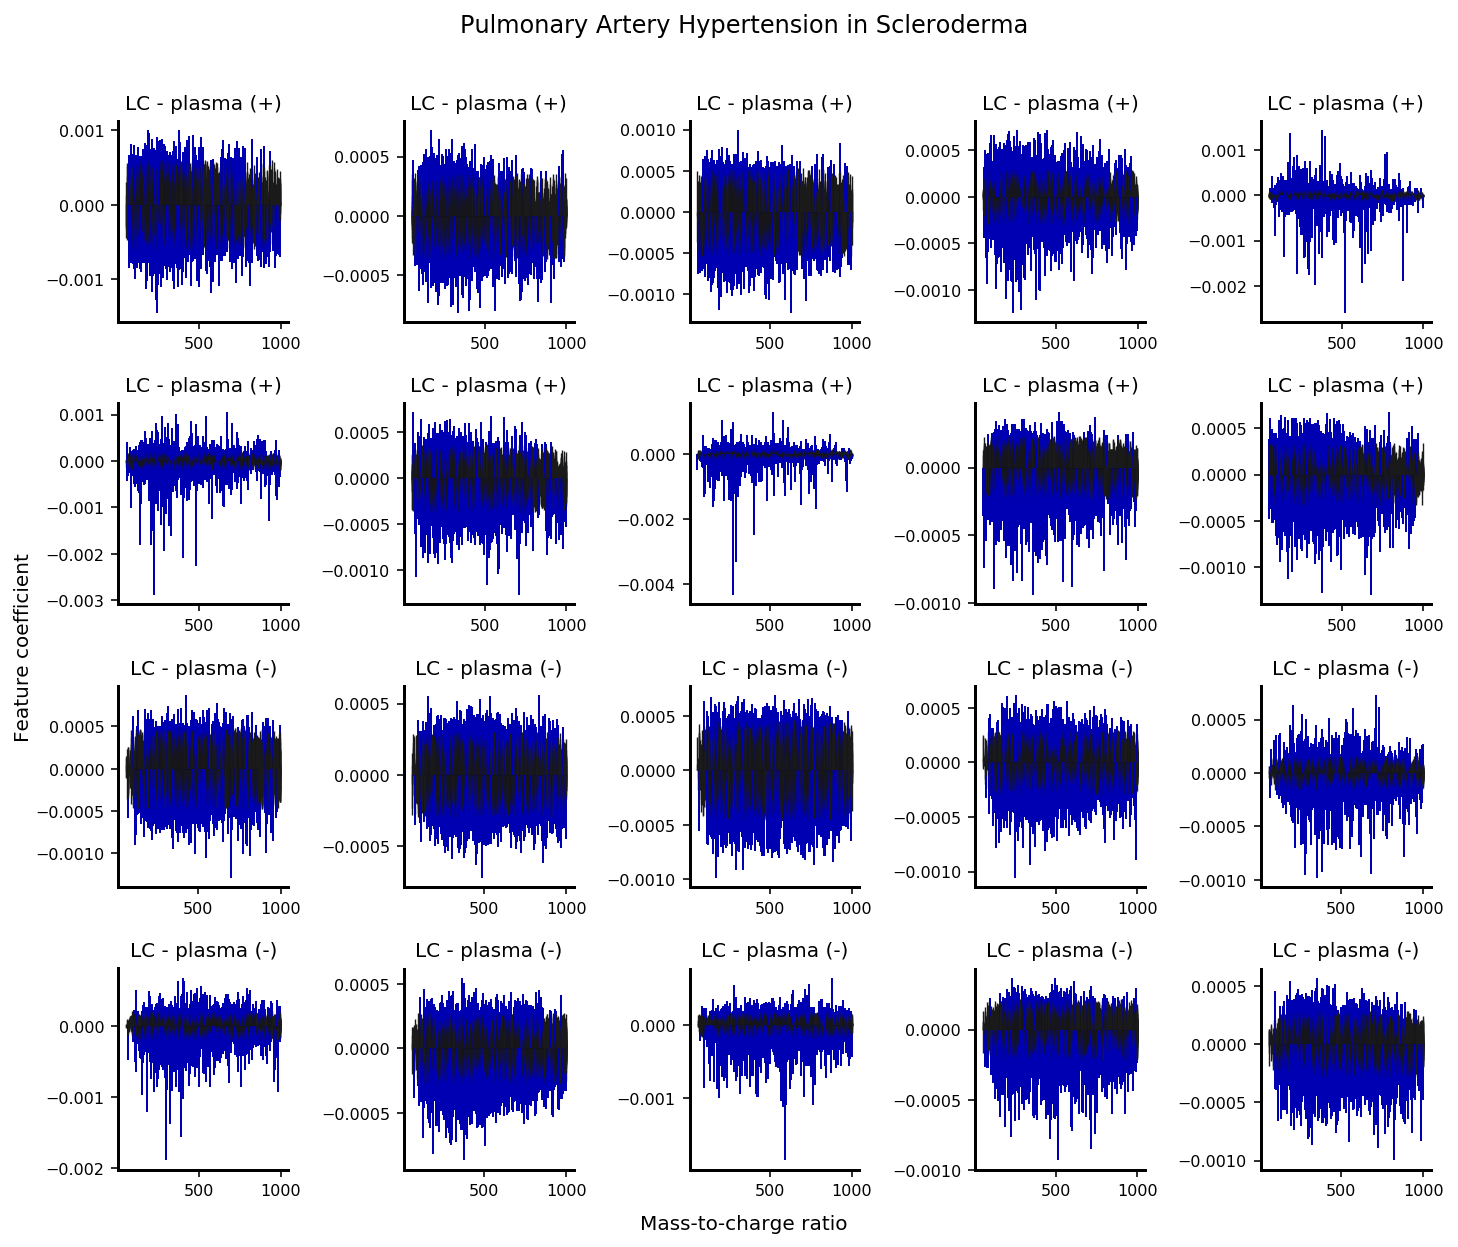

ST000888



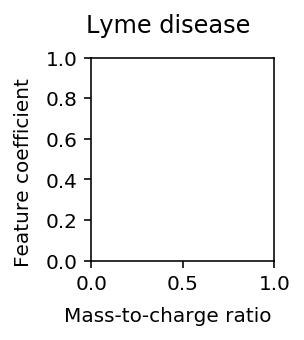

ST000918



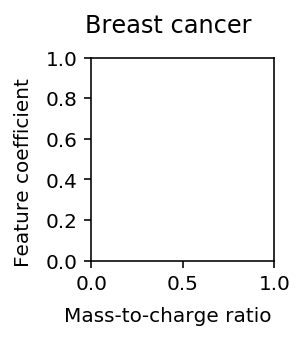

In [46]:
meta_data = pd.read_csv('./ms_instrument_column_polarity_dataset_names.csv')
for study in ds_to_study:
    num_plots = len(ds_to_study[study])
    if num_plots > 4 and num_plots <= 16:
        fig = plt.figure(figsize=(2*num_plots/2,4))
        gs = gridspec.GridSpec(2, int(num_plots/2), width_ratios=[1 for ele in range(int(num_plots/2))], height_ratios=[1 for ele in range(2)])
    elif num_plots > 16:
        fig = plt.figure(figsize=(2*num_plots/4,8))
        gs = gridspec.GridSpec(4, int(num_plots/4), width_ratios=[1 for ele in range(int(num_plots/4))], height_ratios=[1 for ele in range(4)])
    else:
        fig = plt.figure(figsize=(2*num_plots,2))
        gs = gridspec.GridSpec(1, num_plots, width_ratios=[1 for ele in range(num_plots)])
    print(study)
    cut_offs = []
    for i, sub_study in enumerate(ds_to_study[study]):
        ax = plt.subplot(gs[i])
        enrichment = list(sub_study['enrichment'])
        pvalues = list(sub_study['indiv_split_p_vals'])
        ### basically these next studies didnt get mz/rt values that can be matched to features soooo they can get plotted
        ### note these are 'author' data...
        if sub_study['data_set'] == 'AN001450' or sub_study['data_set'] == 'AN001503' or sub_study['data_set'] == 'AN000930' or sub_study['data_set'] == 'AN000929' or sub_study['data_set'] == 'AN000618':
            sub_study['peaks'] = sub_study['peaks'].loc[:,~sub_study['peaks'].columns.duplicated()]
            
        try:
            ## if you want to run on just stat sig features will probably need to add in matching for that as well...
            if noaddiso:
                inds = sub_study['features'].columns
                peaks = sub_study['peaks'].loc[inds]
                mz = list(peaks['mz'])
                rt = list(peaks['rt'])
            if all_feat:
                mz = list(sub_study['peaks']['mz'])
                rt = list(sub_study['peaks']['rt'])
        except:
            ## basically for those above studies we just continue and dont care about them since nothing can be done
            ## yay standardization in reporting
            continue
            
        model_coefs = sub_study['indiv_split_model_coefs'] # this is the average of the model coefs over all the runs, not just a sigle one
        if all_feat:
            colors = []
            y_min = []
            y_max = []
            xs = []
            linewidths = []
            for m, coef, p in zip(mz,model_coefs, pvalues):
                if coef == 0.0:
                    continue
                if p < 0.05:
                    c = (0.7, 0.0, 0.0, 1)
                    lw=1.1
                else:
                    c = (0.05, 0.05, 0.05, 1)
                    lw=0.6
                linewidths.append(lw)
                colors.append(c)
                xs.append(m)
                if coef < 0:
                    y_min.append(coef)
                    y_max.append(0)
                else:
                    y_min.append(0)
                    y_max.append(coef)
            ax.vlines(xs,y_min,y_max,colors=colors, linewidths=linewidths)
        if noaddiso:
            model_coefs = np.array(model_coefs)
            model_coefs = model_coefs.mean(axis=0)
            top_p = 5
            cutoff = 0.005
            not_proper_cufoff = True
            while not_proper_cufoff: 
                reduced = model_coefs[np.abs(model_coefs)>cutoff]
                fract = reduced.shape[0] / model_coefs.shape[0]
                if top_p == 10:
                    low_f = 0.095
                    upper_f = 0.105
                elif top_p == 5:
                    low_f = 0.045
                    upper_f = 0.055
                else:
                    low_f = 0.005
                    upper_f = 0.015
                if low_f <= fract <= upper_f:
                    not_proper_cutoff = False
                    break
                if cutoff > 0.01:
                    not_proper_cutoff = False
                    break 
                if cutoff < 0.00009:
                    not_proper_cutoff = False
                    break
                if fract > upper_f:
                    cutoff += 0.000001
                elif fract < low_f:
                    cutoff -= 0.000001
            cut_offs.append(str(round(cutoff,4)))
            colors = []
            y_min = []
            y_max = []
            xs = []
            linewidths = []
            for m, coef in zip(mz,model_coefs):
                if coef == 0.0:
                    continue
                if abs(coef) > cutoff:
                    c = (0.0, 0.0, 0.7, 1)
                    lw = 1.0
                elif abs(coef) < cutoff/1000:
                    c = (0.4, 0.4, 0.4, 1)
                    lw=0.7
                else:
                    c = (0.10, 0.10, 0.10, 1)
                    lw= 0.7
                colors.append(c)
                linewidths.append(lw)
                xs.append(m)
                if coef < 0:
                    y_min.append(coef)
                    y_max.append(0)
                else:
                    y_min.append(0)
                    y_max.append(coef)
            ax.vlines(xs,y_min,y_max,colors=colors, linewidths=linewidths)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.tick_params(direction='out')
        for tick in ax.get_yticklabels():
            tick.set_fontname("Dejavu Sans")
            tick.set_fontsize(8)
        for tick in ax.get_xticklabels():
            tick.set_fontname("Dejavu Sans")
            tick.set_fontsize(8)
        ax.spines['left'].set_linewidth(1.5)
        ax.spines['bottom'].set_linewidth(1.5)
        instrument = list(meta_data[meta_data.analysis == sub_study['data_set']].Instrument_category)[0]
        stype = list(meta_data[meta_data.analysis == sub_study['data_set']].type)[0]
        mode = meta_data[meta_data.analysis == sub_study['data_set']]['mode'].values[0]
        if mode == 'positive':
            mode = '+'
        if mode == 'negative':
            mode = '-'
        ax.set_title('{} - {} ({})'.format(instrument, stype, mode), fontdict={'fontsize':10, 'fontname':'Dejavu Sans'})
    if noaddiso:
        comb_cutoffs = '_'.join(cut_offs)
    sup_title = sub_study['disease']
    if sup_title in fixes:
        sup_title = fixes[sup_title]
    sup_title = sup_title[0].upper() + sup_title[1:]
    fig.suptitle(sup_title,y=1.05)
    fig.text(0,0.5,'Feature coefficient',horizontalalignment='center',verticalalignment='center', rotation='vertical')
    fig.text(0.5,0,'Mass-to-charge ratio',horizontalalignment='center',verticalalignment='center')
    plt.tight_layout()
    if noaddiso:
        plt.savefig('SI_no_stat_noadd_noiso_mz_top_{}_percent_modelcoef_{}_cutoff_{}.svg'.format(top_p,comb_cutoffs,study), format='svg', dpi=1000, bbox_inches='tight')
    if all_feat:
        plt.savefig('SI_all_feat_mz_modelcoef_pval_{}.svg'.format(study), format='svg', dpi=1000, bbox_inches='tight')
    plt.show()

In [49]:
# make_mz_rt_plots = False
# make_mz_lines = False
# correlation_coef_enrich = True
# # breast_cancer = ['MTBLS17', 'MTBLS19_data', 'MTBLS92', 'ST000355', 'ST000356']
# for study in ds_to_study:
# #     if study not in breast_cancer:
# #         continue
#     print(study)
#     for sub_study in ds_to_study[study]:
#         enrichment = list(sub_study['enrichment'])
# #         pvalues = list(sub_study['pvalues'])
#         pvalues = list(sub_study['indiv_split_p_vals'])
#         if sub_study['data_set'] == 'AN001503' or sub_study['data_set'] == 'AN000930' or sub_study['data_set'] == 'AN000929' or sub_study['data_set'] == 'AN000618':
#             sub_study['peaks'] = sub_study['peaks'].loc[:,~sub_study['peaks'].columns.duplicated()]
#         try:
#             mz = list(sub_study['peaks']['mz'])
#             rt = list(sub_study['peaks']['rt'])
#         except:
#             continue
# #         model_coefs = sub_study['clf'].coef_[0].tolist()
#         model_coefs = sub_study['indiv_split_model_coefs']
#         colors = []
#         ecolors = []
#         shapes = []
#         sizes = []
#         alphas = []
#         if make_mz_rt_plots:
#             for p,mod,en in zip(pvalues, model_coefs, enrichment):
#                 if p > 0.05 and mod == 0:
#                     colors.append('lightgrey')
#                     alphas.append(0.4)
#                     shapes.append('o')
#                     sizes.append(10)
#                     ecolors.append('')
#                 elif p <= 0.05 and mod == 0:
#                     if en > 1.0:
#                         colors.append('firebrick')
#                     else:
#                         colors.append('royalblue')
#                     alphas.append(0.7)
#                     shapes.append('^')
#                     sizes.append(-5*np.log(p))
#                     ecolors.append('k')
#                 elif p > 0.05 and mod != 0:
#                     if en > 1.0:
#                         colors.append('firebrick')
#                     else:
#                         colors.append('royalblue')
#                     alphas.append(0.7)
#                     shapes.append('s')
#                     sizes.append(20*(np.absolute(mod)+1))
#                     ecolors.append('k')
#                 elif p <= 0.05 and mod != 0:
#                     if en > 1.0:
#                         colors.append('firebrick')
#                     else:
#                         colors.append('royalblue')
#                     alphas.append(0.7)
#                     shapes.append('D')
#     #                 print(-5*np.log(p),-5*np.log(1/np.absolute(mod)))
#                     sizes.append(max(-5*np.log(p),5*np.log(1/np.absolute(mod))))
#                     ecolors.append('k')
#                 else:
#                     print(p,mod,en)
#             for rt,mz,c,e_c,sh,si,a in zip(rt, mz, colors, ecolors, shapes, sizes, alphas):
#                 plt.scatter(rt, mz, c=c, s=si, marker=sh, alpha=a, edgecolors=e_c)
#             print(sub_study['data_set'], sub_study['features'].shape, sub_study['pvalues'][sub_study['pvalues'] <= 0.05].shape)
#             plt.show()
#         if make_mz_lines:
#             for m, coef, en in zip(mz,model_coefs, enrichment):
#                 if en > 1.0:
#                     c = 'r'
#                 else:
#                     c = 'b'
#                 plt.plot([m,m],[0,coef], c=c)
#             plt.show()
#         if correlation_coef_enrich:
#             print(sub_study['data_set'])
#             model_coefs = np.asarray(model_coefs)
#             enrichment = np.asarray(enrichment)
#             pvalues = np.asarray(pvalues)
#             m_coef = model_coefs[model_coefs != 0]
#             en = enrichment[model_coefs != 0]
#             ps = pvalues[model_coefs !=0]
#             col = ['b' if ele <= 0.05 else 'r' for ele in ps]
#             plt.scatter(m_coef, en, c=col, edgecolor='k')
#             plt.show()